### Clustering and Grouping: an example from Leo V and IV
 #### Dr. Elaina A. Hyde
 ##### This material is designed to be run in the middle of the slide presentation for Clustering and Grouping, together providing approximately a 1 hour workshop.

#### EDA Exploratory Data Analysis and Statistical Analysis:


In [35]:
import sys
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axis
from matplotlib.patches import Ellipse
import scipy
import numpy as np
from numpy import *
import math
import pylab
import random
from pylab import *
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab as P
from astropy.io import ascii
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

matplotlib.style.use('ggplot')

sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [36]:
dat4=ascii.read("Leo4_lisp_rod_sdss_ppmxl",data_start=2)
dat5=ascii.read("Leo5_lisp_rod_sdss_ppmxl",data_start=2)
datB=ascii.read("LeoB_lisp_rod_sdss_ppmxl",data_start=2)

#print(dat4)

### Central Coordinates of Leo4,5

In [37]:
#Leo4
Rc4=173.237 #degrees
Dc4=-0.533
vhelc4=132 #Simon and Geha 2007 km/s
dhel4=160 #kpc, heliocentric distance, Belokurov et al 2007

#Leo5
Rc5=172.790 #degrees
Dc5=2.220
vhelc5=173.3 #pm 3.1 km/s from Belokurov 2008

### Leo4

In [38]:
vhc4 = dat4['Vhel']
verr4 = dat4['Verr']
Radeg4=dat4['RA']
Decdeg4=dat4['DEC']

c4 = SkyCoord(Radeg4*u.degree, Decdeg4*u.degree)
c4_icrs = SkyCoord(Radeg4*u.degree, Decdeg4*u.degree, frame='icrs')

l4=c4_icrs.galactic.l.degree
b4=c4_icrs.galactic.b.degree

VLSR4=vhc4 + 9*np.cos(l4)*np.cos(b4) + 12*np.sin(l4)*np.cos(b4) + 7*np.sin(b4)
VGSR4=VLSR4 + 220*np.sin(l4)*np.cos(b4)

l41=np.cos(l4)
l4d=np.arccos(l41)*180/np.pi #convert to degrees
#lbdp=lOd[P1]
b41=np.cos(b4)
b4d=np.arccos(b41)*180/np.pi #convert to degrees
#bbdp=bOd[P1]

P14=(dat4['prob']==1.0)

### Leo 5

In [39]:
vhc5 = dat5['Vhel']
verr5 = dat5['Verr']
Radeg5=dat5['RA']
Decdeg5=dat5['DEC']

c5 = SkyCoord(Radeg5*u.degree, Decdeg5*u.degree)
c5_icrs = SkyCoord(Radeg5*u.degree, Decdeg5*u.degree, frame='icrs')

l5=c5_icrs.galactic.l.degree
b5=c5_icrs.galactic.b.degree

VLSR5=vhc5 + 9*np.cos(l5)*np.cos(b5) + 12*np.sin(l5)*np.cos(b5) + 7*np.sin(b5)
VGSR5=VLSR5 + 220*np.sin(l5)*np.cos(b5)

l51=np.cos(l5)
l5d=np.arccos(l51)*180/np.pi #convert to degrees
#lbdp=lOd[P1]
b51=np.cos(b5)
b5d=np.arccos(b51)*180/np.pi #convert to degrees
#bbdp=bOd[P1]

P15=(dat5['prob']==1.0)

### Leo B

In [40]:
vhcB = datB['Vhel']
verrB = datB['Verr']
RadegB=datB['RA']
DecdegB=datB['DEC']

cB = SkyCoord(RadegB*u.degree, DecdegB*u.degree)
cB_icrs = SkyCoord(RadegB*u.degree, DecdegB*u.degree, frame='icrs')

lB=cB_icrs.galactic.l.degree
bB=cB_icrs.galactic.b.degree

VLSRB=vhcB + 9*np.cos(lB)*np.cos(bB) + 12*np.sin(lB)*np.cos(bB) + 7*np.sin(bB)
VGSRB=VLSRB + 220*np.sin(lB)*np.cos(bB)

lb1=np.cos(lB)
lbd=np.arccos(lb1)*180/np.pi #convert to degrees
#lbdp=lOd[P1]
bb1=np.cos(bB)
bbd=np.arccos(bb1)*180/np.pi #convert to degrees
#bbdp=bOd[P1]

P1b=(datB['prob']==1.0)

### Exploratory Plots

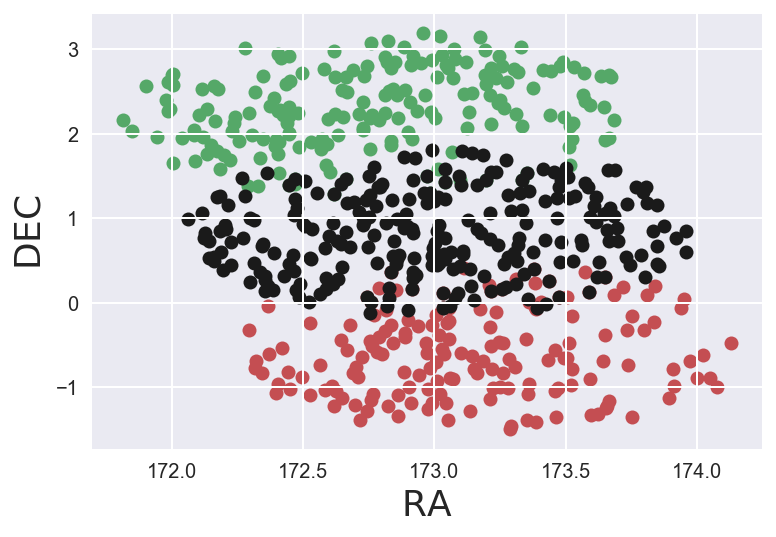

In [41]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,Decdeg4,'or',label='Leo4',zorder=-1)
ax.plot(Radeg5,Decdeg5,'og',label='Leo5',zorder=-1)
ax.plot(RadegB,DecdegB,'ok',label='Leo4.5',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

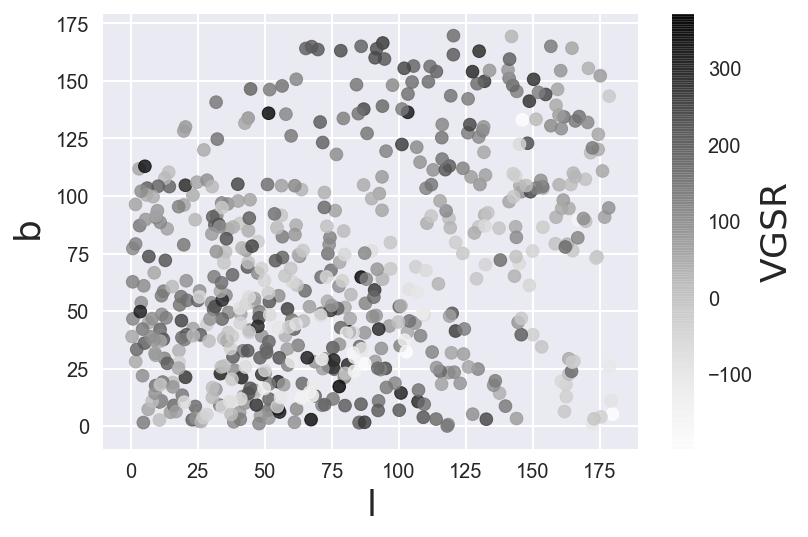

In [42]:
fig2=plt.figure(2)
ax=fig2.add_subplot(111)
plt.scatter(l4d,b4d,marker='o',s=40,c=VGSR4,label='Leo4', alpha=0.8)
plt.scatter(l5d,b5d,marker='o',s=40,c=VGSR5,label='Leo5', alpha=0.8)
plt.scatter(lbd,bbd,marker='o',s=40,c=VGSRB,label='Leo4.5', alpha=0.8)
cbar=plt.colorbar()
cbar.set_label(r'$\mathrm{VGSR}$',fontsize=18)
ax.set_xlabel(r'$\mathrm{l}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{b}$',fontsize=18)
plt.show()

#### Pandas is good. Convert to a data frame for all sorts of easy checks

In [43]:
df4=pd.DataFrame({}, dtype=float)
df4['Ra']=Radeg4
df4['Dec']=Decdeg4
df4['V']=VGSR4
df4['P1']=P14.astype(float)
df4['type']='4'

df5=pd.DataFrame({}, dtype=float)
df5['Ra']=Radeg5
df5['Dec']=Decdeg5
df5['V']=VGSR5
df5['P1']=P15.astype(float)
df5['type']='5'

dfb=pd.DataFrame({}, dtype=float)
dfb['Ra']=RadegB
dfb['Dec']=DecdegB
dfb['V']=VGSRB
dfb['P1']=P1b.astype(float)
dfb['type']=0
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,167.0,173.145054,0.435742,172.294416,172.813573,173.101125,173.461591,174.130467
Dec,167.0,-0.594130,0.489895,-1.491850,-0.994701,-0.638332,-0.222024,0.413713
V,167.0,235.657885,94.570009,-69.847086,185.566624,228.221182,291.357989,483.771435
P1,167.0,0.263473,0.441842,0.000000,0.000000,0.000000,1.000000,1.000000


#### Basic pandas histograms with grouped data

In [10]:
dfall=pd.concat([df4, df5, dfb], ignore_index=True)
dfall.describe().T
group=dfall.groupby(['type','P1'])
group.mean()

Ra       Dec           V
type P1                                   
0    0.0  172.989940  0.871621   74.577547
     1.0  172.995814  0.725734   98.374220
4    0.0  173.138978 -0.608599  233.313089
     1.0  173.162040 -0.553684  242.212656
5    0.0  172.754439  2.287127  143.496266
     1.0  172.781731  2.296639  133.717124

#### Note the easy checking of data format and types in a pandas dataframe

In [11]:
dfall.isnull().sum()


Ra      0
Dec     0
V       0
P1      0
type    0
dtype: int64

In [12]:
dfall.dtypes

Ra      float64
Dec     float64
V       float64
P1      float64
type     object
dtype: object

In [13]:
obj_counts = dfall.groupby('type').size()
obj_counts

type
0    254
4    167
5    190
dtype: int64

#### The average Velocity per object as a histogram.

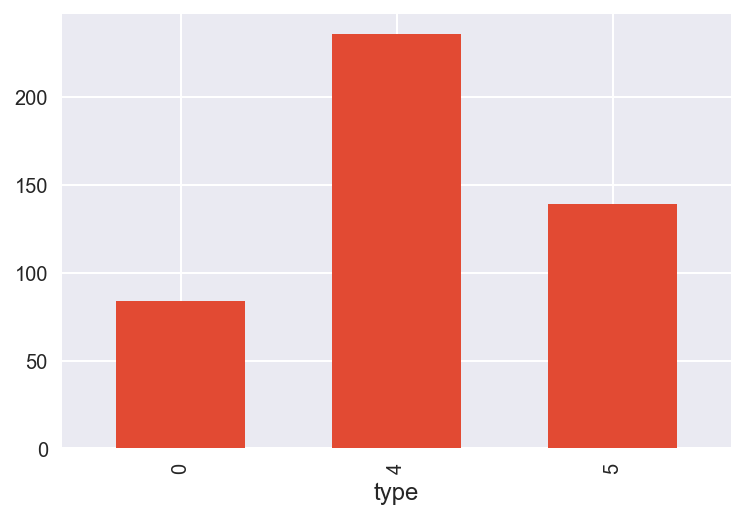

In [14]:
dfall.groupby(['type'])['V'].mean().plot(kind='bar', width=0.6)

When we have a hierarchical index like we do above, the .unstack() command will attempt to move the subcategory from an index to column representation.

We can sort each group by it's object and it's membership.

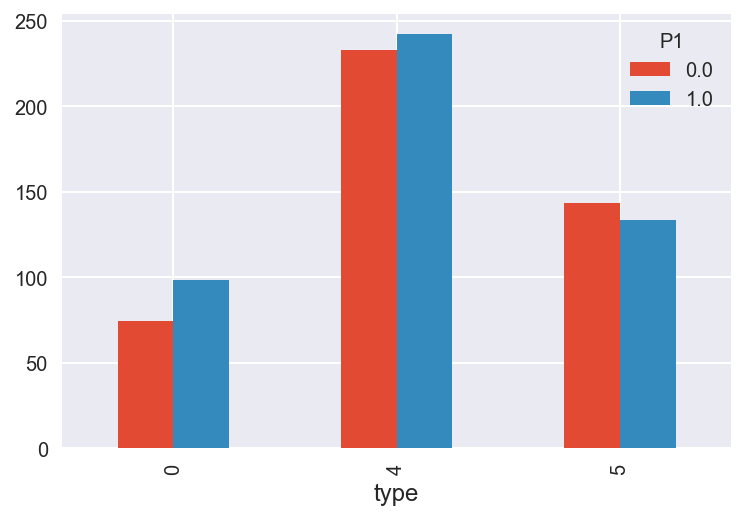

In [15]:
mean_v = dfall.groupby(['type','P1'])['V'].mean()
mean_v.unstack().plot(kind='bar')

A quick extra: seaborn has some very easy box plots

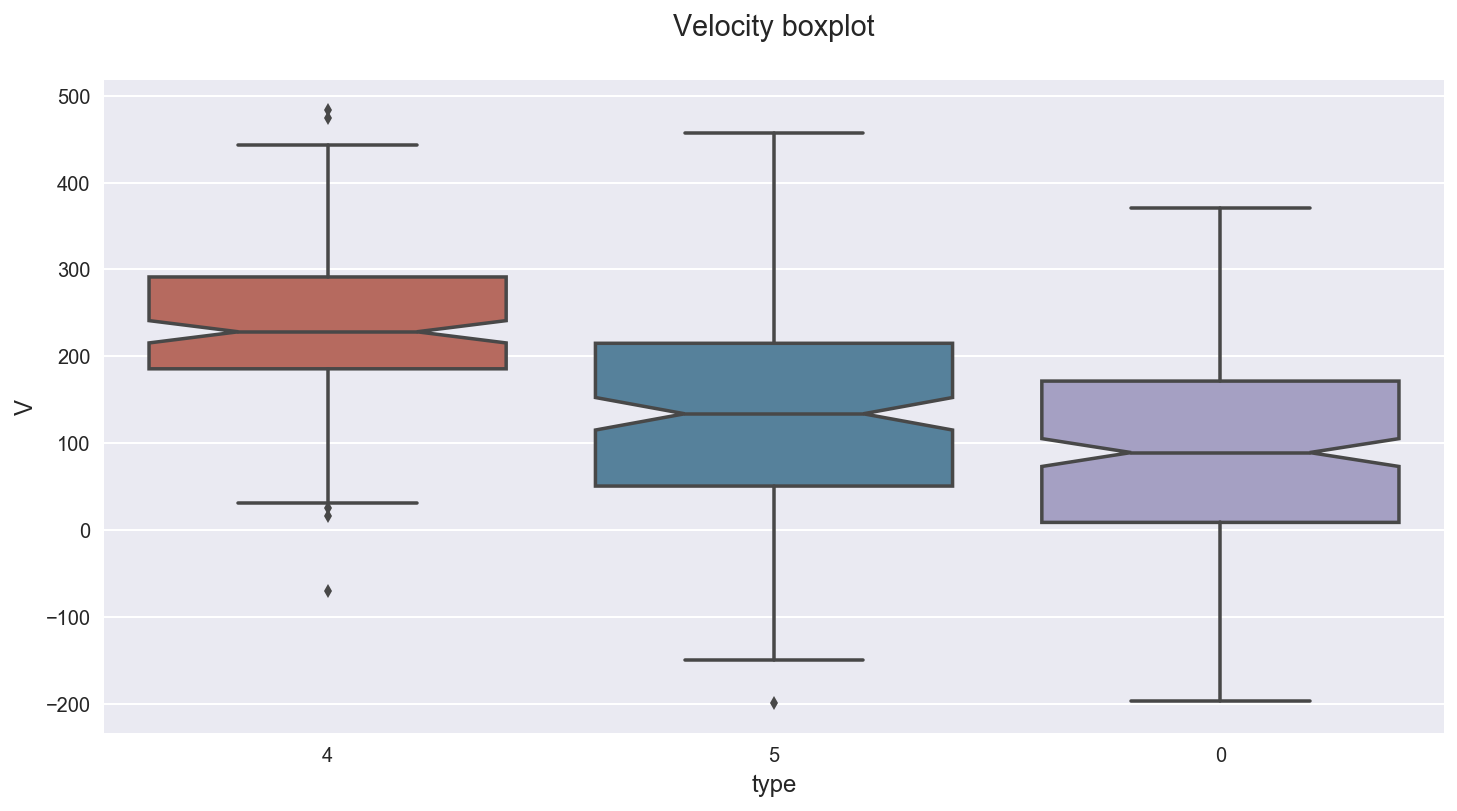

In [16]:
fig1 = plt.figure(figsize=(12,6))
ax = fig1.gca()
ax = sns.boxplot(x="type", y="V", data=dfall,notch=True, saturation=0.5)
ax.set_title('Velocity boxplot\n')
plt.show()

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in .corr() function.
### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

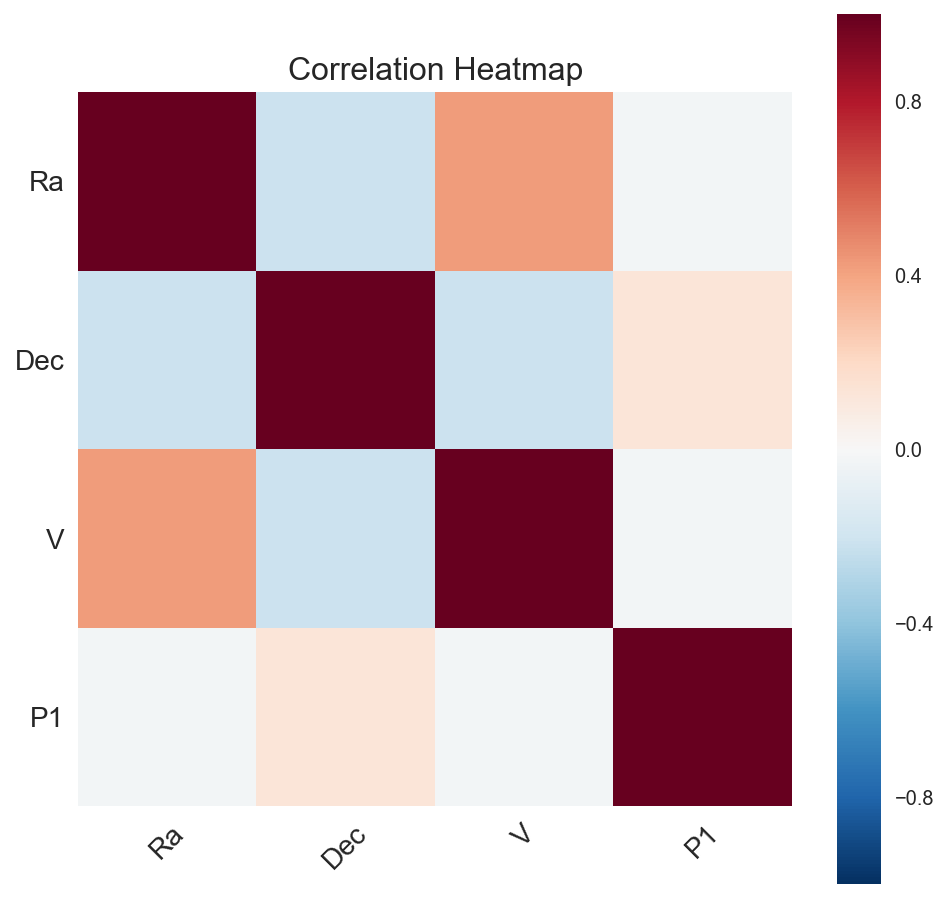

In [17]:
#dfall.corr
corr = dfall.corr()

f, ax = plt.subplots(figsize=(8, 8))

ax = sns.heatmap(data=corr, square=True, ax=ax)
plt.title('Correlation Heatmap',size=16)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
plt.show()

### Clustering and Classification: Labelled and Unlabeled

#### 1. KNN for classification


Create a target vector and predictor matrix

Target should be the type or P1 column.
Predictor matrix should be all columns except P1 and type. This is a cheat on a train/test split

In [18]:
Xk = dfall[[c for c in dfall.columns if not c in ['P1','type']]]
#X = dfall.V.values.astype(float)
yk = dfall.type.values.astype(float)

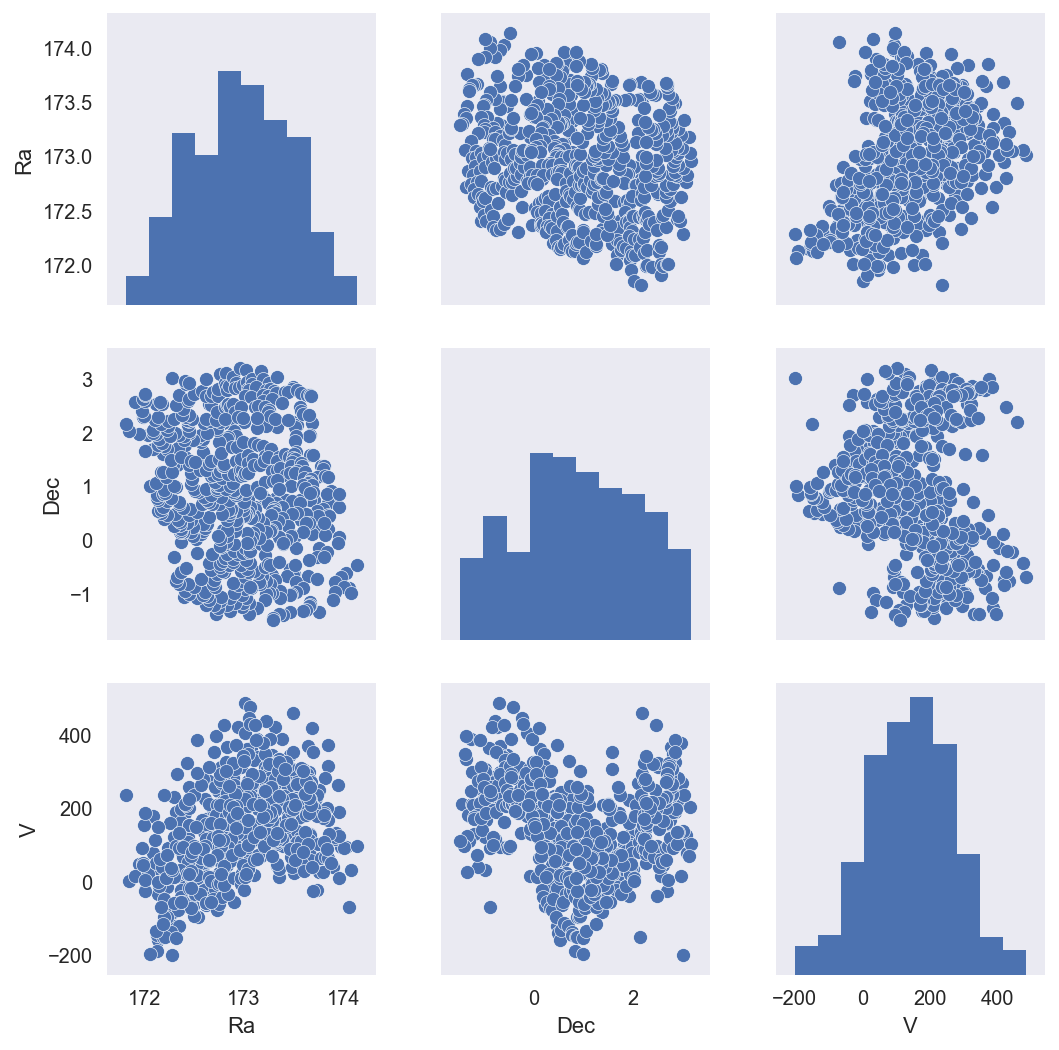

In [19]:
sns.set(style="ticks", color_codes=True)
sns.set_style("dark")
sns.pairplot(dfall[[c for c in dfall.columns if not c in ['P1','type']]])

Cross-validate the KNN model

Number of neighbors should be 3. (this may change)

Make sure to standardize the predictor matrix.

Set cross-validation folds to 10.

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)

#### Standard Scalar

In [21]:
ss = StandardScaler()
Xs = ss.fit_transform(Xk)

In [22]:
scores = cross_val_score(knn, Xs, yk, cv=10)
print(scores)
print(np.mean(scores))

[ 0.66129032  0.51612903  0.67741935  0.93548387  1.          0.95081967
  0.72131148  0.58333333  0.63333333  0.85      ]
0.752912039485


#### Iterate from k=1 to k=49 (only odd k) and cross-validate the accuracy of the model for each.

In [23]:
k_values = range(1,50,2)
accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xs, yk, cv=10)
    accs.append(np.mean(scores))

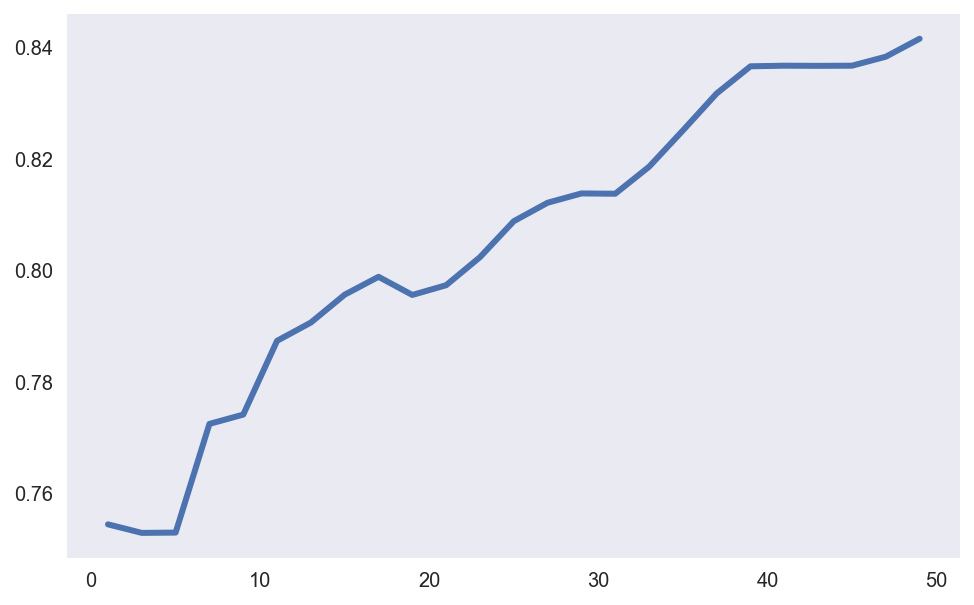

0.841512427287


In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()

print(np.max(accs))

### Likely a sign of overfitting, all members are found if all members are included

#### Note: K-Nearest Neighbors can be used to impute missing values in datasets. The most likely value for the missing data can be estimated based on a KNN model.

In [25]:
X = dfall[[c for c in dfall.columns if not c in ['P1','type']]]
#X = dfall.V.values.astype(float)
y = dfall.P1.values.astype(float)

# Set y  training variable 
# This is a type of train - test split
#Xn = dfall[[c for c in dfall.columns if not c in ['P1','type']]]
#yn = dfall['P1']

ss = StandardScaler()
Xsy = y
Xsx = ss.fit_transform(X)


#### 2. A simple Logistical classification - use our P1 category

In [26]:
# Logistic Regression
# Set parameters for gridsearching

gs_params = {
    'penalty':['l2'], # Lasso penalty 
    'solver':['liblinear'],
    'C':np.logspace(-10,-2,10),
}

# pass gridsearching with logistic regression and parameters
lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
lr_gridsearch.fit(Xsx, Xsy)

# print optimal logreg parameters
print (lr_gridsearch.best_params_)

grid_mean_scores = [result[1] for result in lr_gridsearch.grid_scores_]
best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(Xsx, Xsy))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 0.01, 'solver': 'liblinear', 'penalty': 'l2'}
0.613747954173


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
/Users/xantheterra/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


/Users/xantheterra/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


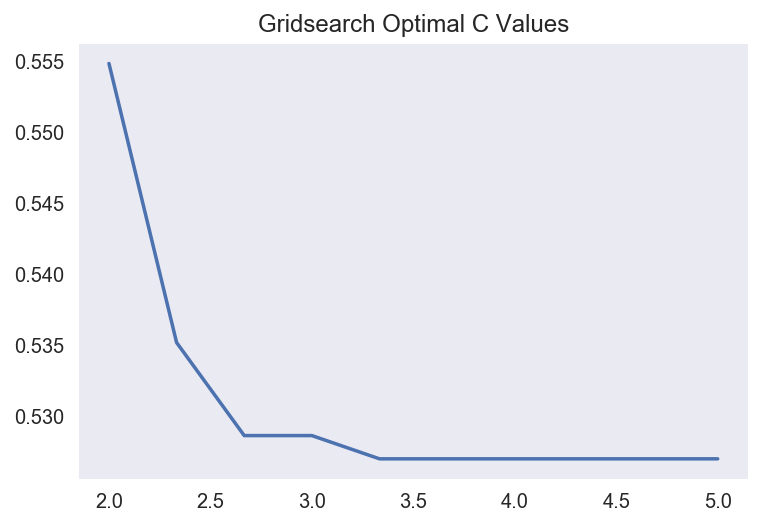

In [27]:
# Check the results of the grid search and print optimal c values
grid_mean_scores = [result[1] for result in lr_gridsearch.grid_scores_]

plt.figure(figsize=(6,4))
plt.title("Gridsearch Optimal C Values")
plt.plot(np.linspace(5,2,10), grid_mean_scores)

In [28]:
best_lr = lr_gridsearch.best_estimator_
print (best_lr.score(Xsx, Xsy))

0.613747954173


In [29]:
# Setup the logistic regression model with hyperparameters, 
#Overall Features logistic regression model.
#squared hinge = l2,squared_hinge
lr = LogisticRegression(penalty='l2', dual=True, C=0.01, solver='liblinear')
#lr = LogisticRegression(penalty='l1', dual=False, C=0.077426368268112777, solver='liblinear')
# Investigate model accuracy:
scores = cross_val_score(lr, Xsx, Xsy, cv=12)
print (scores)
print (np.mean(scores))

# Fit model with predictors and salary target
lr.fit(Xsx, Xsy)

# Create predicted y values
yhat = lr.predict(Xsx)
yhat_pp = lr.predict_proba(Xsx)

# Sum all the true/false positives/negatives combinations
tp = np.sum((Xsy == 1) & (yhat == 1))
fp = np.sum((Xsy == 0) & (yhat == 1))
tn = np.sum((Xsy == 0) & (yhat == 0))
fn = np.sum((Xsy == 1) & (yhat == 0))

# convert the predicted and actual values to a confusion array
confusion_array = np.array(confusion_matrix(Xsy, yhat, labels=[1,0]))

confusion = pd.DataFrame(confusion_array, index=['P1', 'no_P1'],
                         columns=['predicted_P1','predicted_no_P1'])
confusion

[ 0.61538462  0.61538462  0.61538462  0.59615385  0.60784314  0.15686275
  0.21568627  0.62        0.62        0.62        0.62        0.62      ]
0.543558320764


,predicted_P1,predicted_no_P1
P1,1,234
no_P1,2,374


#### 2. Kmeans clustering
In general, k-means will converge to a solution and return a partition of k clusters, even if no natural clusters exist in the data. It's entirely possible – in fact, common – that the clusters do not mean anything at all.

In [30]:
#dfX=pd.DataFrame(X, columns=['Ra', 'Dec', 'V'])
dfX=pd.DataFrame(dfall.V.values.astype(float), columns=['V'])
model = KMeans(n_clusters=3, random_state=0).fit(dfX)

In [31]:
predicted = model.labels_
centroids = model.cluster_centers_
dfX['predicted'] = predicted
print("Location of centroids: ")
print(centroids)
#print(centroids[:,:1])
#print(centroids[:,[1]])

Location of centroids: 
[[ 156.58804779]
 [  -7.42318374]
 [ 301.4419142 ]]


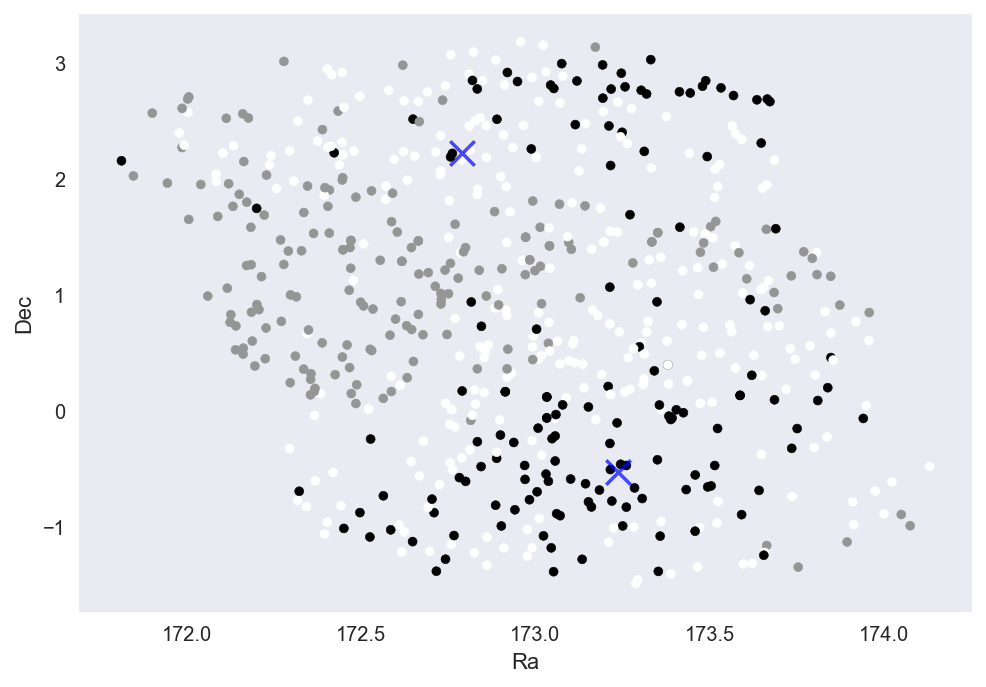

In [32]:
plt.figure(figsize=(7,7))
dfX['Ra']=dfall.Ra
dfX['Dec']=dfall.Dec
dfX.plot(kind="scatter", x="Ra", y="Dec", color=dfX['predicted'])
#actual centers
plt.scatter(Rc4,Dc4, marker='x',s=150, alpha=.7, c="blue")
plt.scatter(Rc5,Dc5, marker='x',s=150, alpha=.7, c="blue")
#n=2
#plt.scatter(centroids[:,:1], centroids[:,[1]], marker='o', s=150, alpha=.7, c=range(0,2), cmap='gist_rainbow')
#n=3
#plt.scatter(centroids[:,:1], centroids[:,[1]], marker='o', s=150, alpha=.7, c=range(0,3), cmap='gist_rainbow')

#### Silhouette Coefficient -- measure of how far apart clusters are
high Silhouette Score = clusters are well separated

In [33]:
score = silhouette_score(dfX, predicted, metric='euclidean')
score

0.51634265693800863

#### K-Means Sumary:
Unsupervised clustering model

Similar to KNN (but for “clustering”)

Iteratively finds labels given K

Easy to implement in sklearn

Sensitive to shape, scale of data

Optimal K hard to evaluate

#### HDBSCAN
HDBSCAN is a density based algorithm. It transforms the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space 

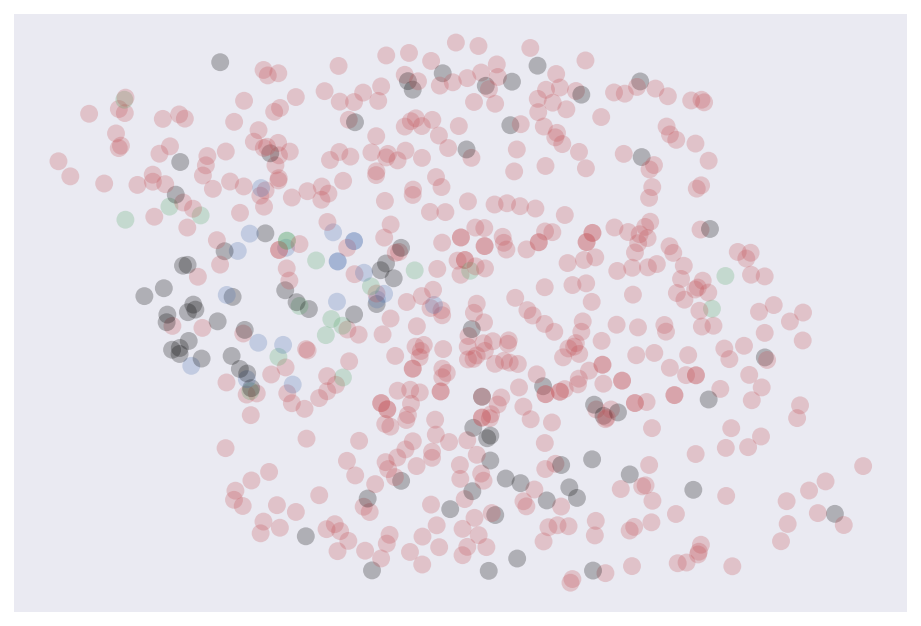

In [34]:
import sklearn.cluster as cluster
import time
import hdbscan
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
# From HDBSCAN documentation
# credit
#http://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html
Xc=pd.DataFrame(X, columns=['Ra','Dec','V'])
start_time = time.time()
labels =(hdbscan.HDBSCAN(min_cluster_size=15).fit_predict(Xc))

#soft clustering option
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True).fit(Xc)
#labels = hdbscan.all_points_membership_vectors(clusterer) #soft_clusters
#reference: http://hdbscan.readthedocs.io/en/latest/soft_clustering.html

end_time = time.time()
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.scatter(X['Ra'], X['Dec'], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

#### Takeaway messages

* Classification on low parameter data is dangerous!
* Categorization heavily dependent on data spacing!
* Supervised and Unsupervised methods have major pitfalls in astronomy but can add a great deal to any data analysis process